## Atividade 11 - Resposta ao impulso em aplicações reais
### João Marcos Amorim de Almeida

- Tarefa 1: Executar os códigos e exemplos apresentados no tutorial Convolution of an Audio Signal with a Room Impulse Response (disponível no primeiro link) afim de compreender como efetuar uma convolução entre um sinal de áudio e uma resposta ao impulso de uma sala;

---

# Characterization of Discrete Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Convolution of an Audio Signal with a Room Impulse Response

The propagation of sound in rooms is modeled by the linear [wave equation](https://en.wikipedia.org/wiki/Wave_equation), a second-order linear partial differential equation with constant coefficients. Consequently, the propagation path from a source (e.g. loudspeaker) at one position to a receiver (e.g. microphone) at another position can be interpreted as a linear time-invariant (LTI) system. This system is characterized for instance by the impulse response between these two positions. This fact can be used for the synthesis of virtual acoustic environments. If a source signal (e.g. speech, instrument) without any room effect is convolved with the impulse response of a room (e.g. concert hall), the impression is created that the source plays in the room. This is also known as [convolution reverb](https://en.wikipedia.org/wiki/Convolution_reverb).

#### Read Speech Signal

First a source signal $x[k]$ is loaded into the vector `x` using the [`soundfile`](http://pysoundfile.readthedocs.io/en/latest/) module for Python

The input signal $x[k]$ is plotted. For ease of illustration, the sample index $k$ is interpreted as time $t = k T$ with the sampling interaval $T$.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as sw
import scipy.signal as sig
import IPython.display as Id

fs, x = sw.read('data/atividade_11/speech.wav')

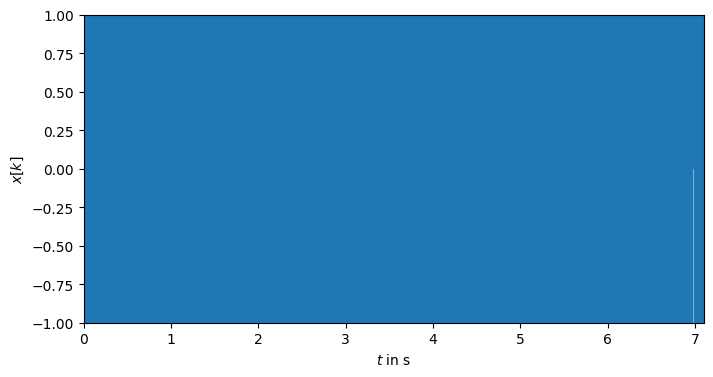

In [2]:
plt.figure(figsize=(8, 4))
t = np.arange(len(x)) / fs
plt.plot(t, x)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$')
plt.axis([0, t[-1], -1, 1])
plt.show()


#### Read Room Impulse Response

The impulse response $h[k]$ of the room is loaded into the vector `h`

In [3]:
fsh, h = sw.read('data/atividade_11/room_impulse_response.wav')

The room impulse response is plotted for illustration

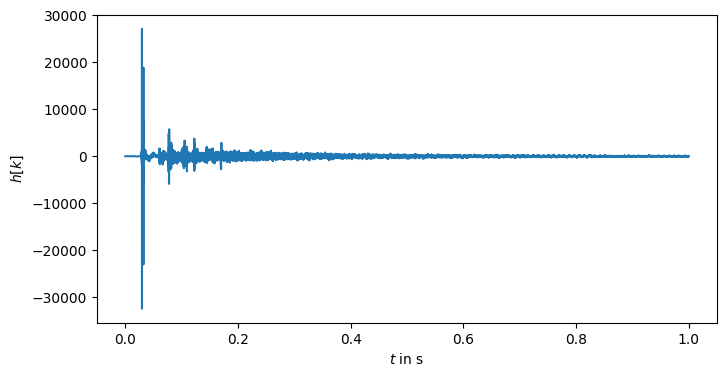

In [4]:
plt.figure(figsize=(8, 4))
t = np.arange(len(h)) / fsh
plt.plot(t, h)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$h[k]$')
plt.show()

#### Convolution

The source signal $x[k]$ is convolved with the room impulse response $h[k]$ in order to compute the output signal $y[k] = x[k] * h[k]$. The computation may take a while due to the involved numerical complexity.

In [5]:
y = np.convolve(h, x)

The output signal $y[k]$ is plotted for illustration. The effect of the room on the source signal is clearly visible.

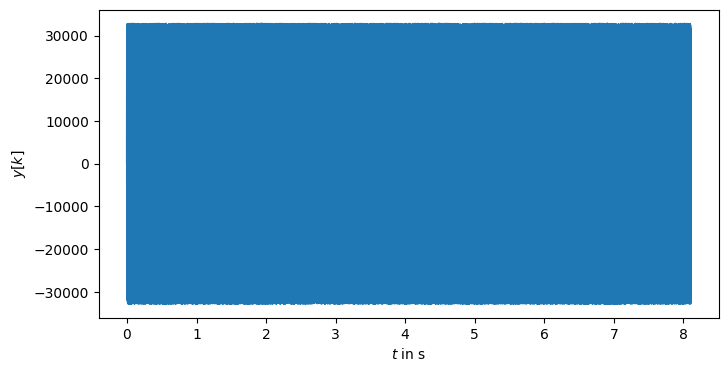

In [6]:
plt.figure(figsize=(8, 4))
t = np.arange(len(y)) / fs
plt.plot(t, y)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$y[k]$')
plt.show()

#### Auralization

The input signal $x[k]$ and the output signal $y[k]$ are normalized and written to files for the purpose of auralization.

In [7]:
sw.write('data/atividade_11/output/dry_source.wav', fs, x)

y = max(x) * y / np.max(np.abs(y))
sw.write('data/atividade_11/output/wet_source.wav', fs, y.astype(np.int16))

Listen to the 'dry' source signal without room effect (input) and the 'wet' signal including the room effect (output) using the embedded controls below.

**Dry source signal without room**


In [10]:
Id.Audio('data/atividade_11/output/dry_source.wav')

**Resulting signal including room**


In [12]:
Id.Audio('data/atividade_11/output/wet_source.wav')

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.